In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [3]:
df = pd.read_csv(url)

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
df = df.drop(["MODELYEAR","MAKE","MODEL" , "VEHICLECLASS" , "TRANSMISSION" ,"FUELTYPE"],axis=1 )

In [6]:
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [7]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [8]:
df = df.drop(["CYLINDERS" , "FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY" , "FUELCONSUMPTION_COMB"], axis = 1)

In [9]:
df.head()

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244


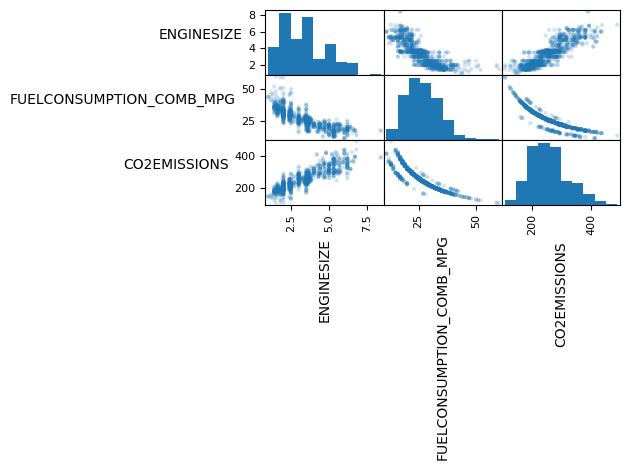

In [10]:
axes = pd.plotting.scatter_matrix(df,alpha=0.2)
for ax in axes.flatten():
  ax.xaxis.label.set_rotation(90)
  ax.yaxis.label.set_rotation(0)
  ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0,hspace=0)
plt.show()

In [11]:
x = df.iloc[:,[0,1]].to_numpy()
y = df.iloc[:,[2]].to_numpy()

In [15]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
x_std = std_scaler.fit_transform(x)

In [17]:
pd.DataFrame(x_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


In [18]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_std,y,test_size=0.2,random_state=42)

In [19]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()
regressor.fit(x_train,y_train)


coef_ = regressor.coef_
intercept_ = regressor.intercept_

print("coefficents: ",coef_)
print("intercept: ",intercept_)

coefficents:  [[ 25.27339614 -37.4381472 ]]
intercept:  [256.29072488]


In [20]:
means = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)

coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means * coef_ ) / std_devs_)


print("coefficents: ",coef_original)
print("intercept: ",intercept_original)
print("means: ",means)
print("standard deviations: ",std_devs_)

coefficents:  [[17.8581369  -5.01502179]]
intercept:  [329.1363967]
means:  [ 3.34629803 26.44142455]
standard deviations:  [1.4152314  7.46520131]


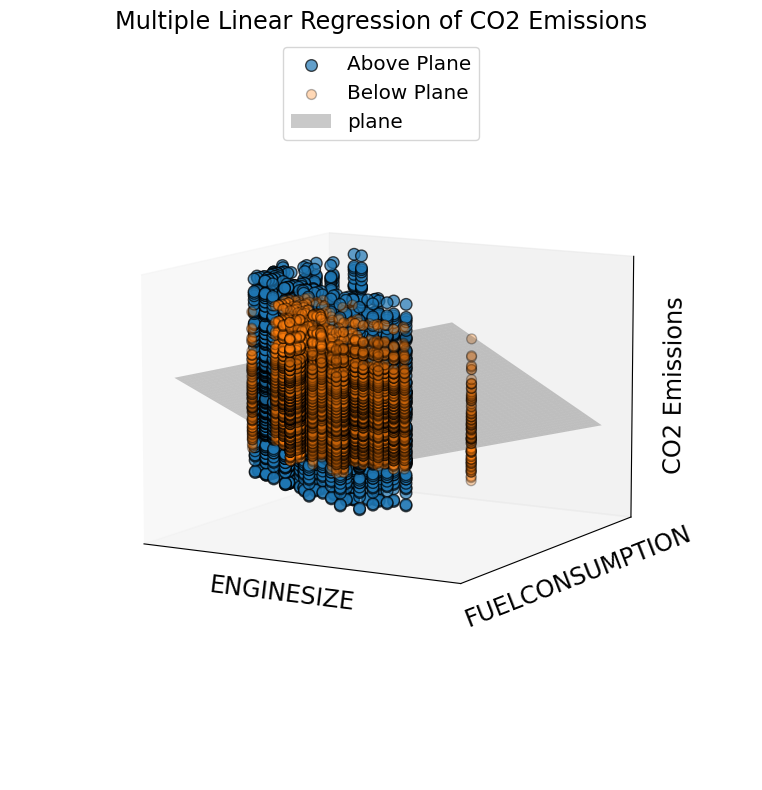

In [22]:
import numpy as np
import matplotlib.pyplot as plt

X1 = x_test[:,0] if x_test.ndim > 1 else x_test
X2 = x_test[:,1] if x_test.ndim > 1 else x_test

x1_surf , x2_surf = np.meshgrid(np.linspace(X1.min(),X1.max(),100),
                                np.linspace(X2.min(),X2.max(),100))
y_surf = intercept_  + coef_[0,0] * x1_surf + coef_[0,1] * x2_surf

y_pred = regressor.predict(x_test.reshape(-1, 1)) if x_test.ndim == 1 else regressor.predict(x_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane[:,0]
below_plane = below_plane[:,0]

# Plotting
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points above and below the plane in different colors
ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane],  label="Above Plane",s=70,alpha=.7,ec='k')
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane],  label="Below Plane",s=50,alpha=.3,ec='k')

# Plot the regression plane
ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21,label='plane')

# Set view and labels
ax.view_init(elev=10)

ax.legend(fontsize='x-large',loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.75)
ax.set_xlabel('ENGINESIZE', fontsize='xx-large')
ax.set_ylabel('FUELCONSUMPTION', fontsize='xx-large')
ax.set_zlabel('CO2 Emissions', fontsize='xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize='xx-large')
plt.tight_layout()
plt.show()

In [26]:
x_train_1 = x_train[:,0]
regressor_1 = linear_model.LinearRegression()
regressor_1.fit(X_train_1.reshape(-1, 1), y_train)

coef_1 = regressor_1.coef_
intercept_1 = regressor_1.intercept_

print("coefficents: ",coef_1)
print("intercept: ",intercept_1)

coefficents:  [[55.18408797]]
intercept:  [256.77183014]


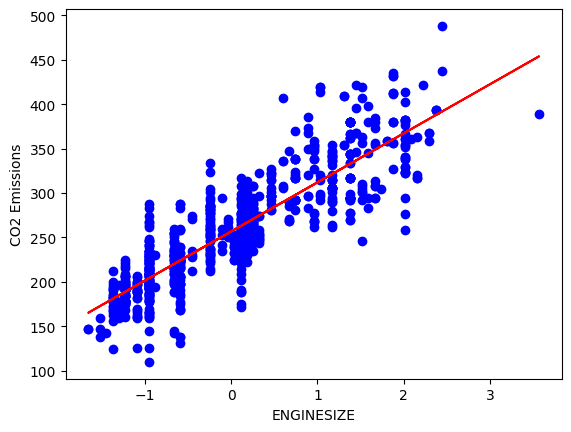

In [32]:
plt.scatter(x_train_1, y_train , color = "blue")
plt.plot(x_train_1 , coef_1[0] * x_train_1 + intercept_1,'-r')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2 Emissions")
plt.show()

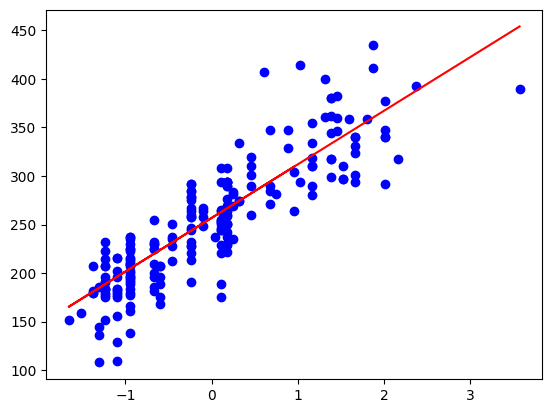

In [30]:

x_test_1 = x_test[:,0]
plt.scatter(x_test_1, y_test , color = "blue")
plt.plot(x_test_1 , coef_1[0] * x_test_1 + intercept_1,'-r')

In [34]:
x_train_2 = x_train[:,1]
regressor_2 = linear_model.LinearRegression()
regressor_2.fit(x_train_2.reshape(-1, 1) , y_train)
coef_2 = regressor_2.coef_
intercept_2 = regressor_2.intercept_

print("coefficents: ",coef_2)
print("intercept: ",intercept_2)

coefficents:  [[-58.51827989]]
intercept:  [256.09392179]


Text(0.5, 0, 'FUELCONSUMPTION')

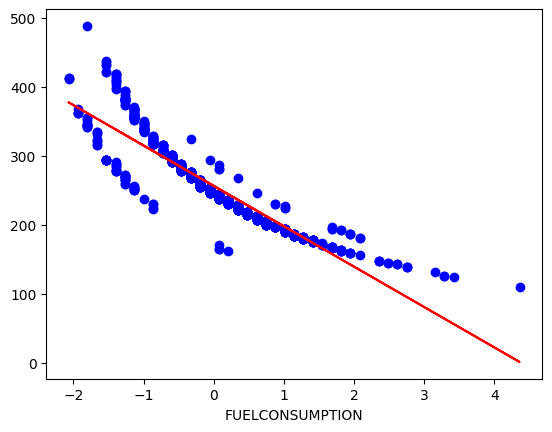

In [35]:
plt.scatter(x_train_2, y_train , color = "blue")
plt.plot(x_train_2 , coef_2[0] * x_train_2 + intercept_2,'-r')
plt.xlabel("FUELCONSUMPTION")

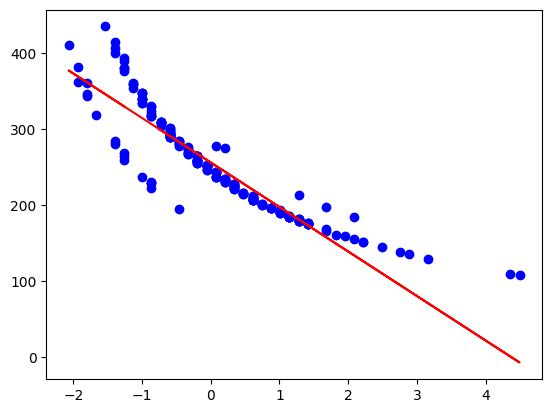

In [37]:
x_test_2 = x_test[:,1]
plt.scatter(x_test_2, y_test , color = "blue")
plt.plot(x_test_2 , coef_2[0] * x_test_2 + intercept_2, '-r')